In [124]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import string

def generate_synthetic_data(rows=1000, cols=30, seed=42):
    """
    Generates a synthetic DataFrame with mixed data types:
    - Boolean
    - Integer (numeric)
    - Float
    - Text
    - Categorical
    - Date

    Parameters:
    - rows: int, number of rows
    - cols: int, total number of columns

    Returns:
    - df: pd.DataFrame, synthetic dataset
    """
    np.random.seed(seed)
    random.seed(seed)

    col_types = ['bool', 'int', 'float', 'text', 'category', 'date']
    type_counts = {k: cols // len(col_types) for k in col_types}
    remainder = cols % len(col_types)
    for i in range(remainder):
        type_counts[col_types[i]] += 1

    data = {}

    for i in range(type_counts['bool']):
        data[f'bool_col_{i}'] = np.random.choice([True, False], size=rows)

    for i in range(type_counts['int']):
        data[f'int_col_{i}'] = np.random.randint(0, 1000, size=rows)

    for i in range(type_counts['float']):
        data[f'float_col_{i}'] = np.random.uniform(0, 1000, size=rows)

    for i in range(type_counts['text']):
        data[f'text_col_{i}'] = [''.join(random.choices(string.ascii_letters, k=10)) for _ in range(rows)]

    for i in range(type_counts['category']):
        data[f'cat_col_{i}'] = pd.Series(np.random.choice(['A', 'B', 'C', 'D'], size=rows)).astype("category")

    base_date = datetime(2020, 1, 1)
    for i in range(type_counts['date']):
        data[f'date_col_{i}'] = [base_date + timedelta(days=np.random.randint(0, 3650)) for _ in range(rows)]

    data[f'target'] = np.random.uniform(0, 1000, size=rows)

    df = pd.DataFrame(data)
    df['target'] = df['target'].astype(float)
    return df

# Generate and preview
main_df = generate_synthetic_data()
df = main_df.copy()
df.head()


,bool_col_0,bool_col_1,bool_col_2,bool_col_3,bool_col_4,int_col_0,int_col_1,int_col_2,int_col_3,int_col_4,...,cat_col_1,cat_col_2,cat_col_3,cat_col_4,date_col_0,date_col_1,date_col_2,date_col_3,date_col_4,target
0,True,False,True,False,False,946,839,945,801,955,...,C,D,B,B,2025-08-29,2020-05-08,2028-12-02,2025-11-30,2029-12-21,12.137458
1,False,True,False,False,True,686,123,70,588,599,...,A,D,A,A,2027-09-07,2024-01-10,2025-05-17,2026-10-08,2020-09-21,488.643897
2,True,True,False,False,True,750,992,363,809,755,...,C,A,C,C,2025-02-06,2027-04-15,2026-12-04,2028-02-13,2020-11-28,644.205482
3,True,True,False,False,True,771,112,569,648,380,...,C,B,D,C,2025-06-02,2025-09-13,2022-07-10,2026-03-27,2026-02-13,918.191773
4,True,True,False,True,False,902,11,801,617,328,...,B,A,C,D,2024-10-02,2027-11-06,2023-12-01,2029-03-08,2022-12-22,381.335817


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   bool_col_0   1000 non-null   bool          
 1   bool_col_1   1000 non-null   bool          
 2   bool_col_2   1000 non-null   bool          
 3   bool_col_3   1000 non-null   bool          
 4   bool_col_4   1000 non-null   bool          
 5   int_col_0    1000 non-null   int32         
 6   int_col_1    1000 non-null   int32         
 7   int_col_2    1000 non-null   int32         
 8   int_col_3    1000 non-null   int32         
 9   int_col_4    1000 non-null   int32         
 10  float_col_0  1000 non-null   float64       
 11  float_col_1  1000 non-null   float64       
 12  float_col_2  1000 non-null   float64       
 13  float_col_3  1000 non-null   float64       
 14  float_col_4  1000 non-null   float64       
 15  text_col_0   1000 non-null   object        
 16  text_co

In [99]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
bool_col_0,1000,2,False,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bool_col_1,1000,2,True,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bool_col_2,1000,2,True,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bool_col_3,1000,2,False,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bool_col_4,1000,2,True,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_col_0,1000.0,NaN,NaN,NaN,502.168,0.0,253.0,512.0,745.75,999.0,288.113751
int_col_1,1000.0,NaN,NaN,NaN,503.689,2.0,255.0,505.0,753.0,998.0,287.199213
int_col_2,1000.0,NaN,NaN,NaN,509.54,0.0,246.0,495.5,781.25,999.0,295.275966
int_col_3,1000.0,NaN,NaN,NaN,503.762,0.0,263.5,500.0,749.0,998.0,286.025838
int_col_4,1000.0,NaN,NaN,NaN,485.077,0.0,217.5,496.0,725.0,999.0,287.569573


In [100]:
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
date_cols = df.select_dtypes(include=["datetime64"]).columns.tolist()
bool_cols = df.select_dtypes(include=["bool"]).columns.tolist()
all_cols = df.columns.tolist()

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types as ptypes

def univariate_analysis(df, max_unique=20, plot=False, type="numeric", cols=None):
    """
    Performs univariate analysis on specified DataFrame columns.

    Parameters:
    - df (pd.DataFrame): Input dataset.
    - max_unique (int): Max unique values for a column to be considered for categorical summary.
    - plot (bool): Whether to display distribution plots.
    - type (str): "numeric", "categorical", "datetime", "bool", or "all".
    - cols (list): Optional list of columns to analyze. If None, inferred from type.

    Returns:
    - pd.DataFrame: Summary statistics for selected columns.
    """
    summary = []

    # Auto-select columns based on type
    if cols is None:
        if type == "numeric":
            cols = df.select_dtypes(include=["number"]).columns.tolist()
        elif type == "categorical":
            cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
        elif type == "datetime":
            cols = df.select_dtypes(include=["datetime64"]).columns.tolist()
        elif type == "bool":
            cols = df.select_dtypes(include=["bool"]).columns.tolist()
        else:
            cols = df.columns.tolist()

    for col in cols:
        col_data = df[col].dropna()
        dtype = col_data.dtype
        info = {
            "Column": col,
            "Dtype": dtype,
            "Missing": df[col].isnull().sum(),
            "Unique": df[col].nunique()
        }

        if ptypes.is_numeric_dtype(col_data) and not ptypes.is_bool_dtype(col_data):
            q1 = col_data.quantile(0.25)
            q3 = col_data.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
            outlier_percent = 100 * len(outliers) / len(col_data) if len(col_data) > 0 else 0

            info.update({
                "Mean": col_data.mean(),
                "Median": col_data.median(),
                "Mode": col_data.mode().iloc[0] if not col_data.mode().empty else np.nan,
                "Min": col_data.min(),
                "Max": col_data.max(),
                "Variance": col_data.var(),
                "Skewness": col_data.skew(),
                "Kurtosis": col_data.kurt(),
                "Q1": q1,
                "Q3": q3,
                "IQR": iqr,
                "Lower Bound": lower_bound,
                "Upper Bound": upper_bound,
                "Outliers": len(outliers),
                "Outlier %": round(outlier_percent, 2)
            })
            if plot:
                plt.figure(figsize=(6, 4))
                sns.histplot(col_data, kde=True)
                plt.title(f'Distribution of {col}')
                plt.tight_layout()
                plt.show()
        elif ptypes.is_categorical_dtype(col_data) or (ptypes.is_object_dtype(col_data) and col_data.nunique() <= max_unique):
            info["Top Values"] = col_data.value_counts().head(3).to_dict()
            info["Top Count"] = col_data.value_counts().head(1).values[0]
            info["Top Percent"] = round(100 * info["Top Count"] / len(col_data), 2)
            if plot:
                plt.figure(figsize=(6, 4))
                sns.countplot(y=col_data, order=col_data.value_counts().index)
                plt.title(f'Distribution of {col}')
                plt.tight_layout()
                plt.show()
        elif ptypes.is_bool_dtype(col_data):
            info["Top Values"] = col_data.value_counts().to_dict()
            info["True Count"] = col_data.sum()
            info["False Count"] = len(col_data) - info["True Count"]
            if plot:
                plt.figure(figsize=(5, 3))
                sns.countplot(x=col_data)
                plt.title(f"Boolean Distribution - {col}")
                plt.tight_layout()
                plt.show()
        elif ptypes.is_datetime64_any_dtype(col_data):
            monthly_counts = col_data.dt.to_period("M").value_counts().sort_index()
            info["Top Periods"] = monthly_counts.head(3).to_dict()
            info["Least"] = col_data.min()
            info["Highest"] = col_data.max()

            if plot:
                monthly_counts.plot(kind='bar', figsize=(8, 4), title=f"Monthly Frequency - {col}")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
        else:
            info["Top Values"] = "Unsupported type or too many uniques"
        
        summary.append(info)

    return pd.DataFrame(summary)


In [102]:
summary_df = univariate_analysis(df, type="numeric", cols=numeric_cols)
summary_df


,Column,Dtype,Missing,Unique,Mean,Median,Mode,Min,Max,Variance,Skewness,Kurtosis,Q1,Q3,IQR,Lower Bound,Upper Bound,Outliers,Outlier %
0,int_col_0,int32,0,637,502.168000,512.000000,12.000000,0.000000,999.000000,83009.533309,-0.023801,-1.182780,253.000000,745.750000,492.750000,-486.125000,1484.875000,0,0.0
1,int_col_1,int32,0,626,503.689000,505.000000,206.000000,2.000000,998.000000,82483.387667,-0.012613,-1.206621,255.000000,753.000000,498.000000,-492.000000,1500.000000,0,0.0
2,int_col_2,int32,0,634,509.540000,495.500000,236.000000,0.000000,999.000000,87187.896296,-0.026049,-1.271798,246.000000,781.250000,535.250000,-556.875000,1584.125000,0,0.0
3,int_col_3,int32,0,637,503.762000,500.000000,606.000000,0.000000,998.000000,81810.780136,0.007108,-1.181483,263.500000,749.000000,485.500000,-464.750000,1477.250000,0,0.0
4,int_col_4,int32,0,625,485.077000,496.000000,78.000000,0.000000,999.000000,82696.259330,0.052336,-1.205530,217.500000,725.000000,507.500000,-543.750000,1486.250000,0,0.0
5,float_col_0,float64,0,1000,487.287292,474.731060,0.627517,0.627517,999.049498,86848.191498,0.055873,-1.234635,231.114892,746.465674,515.350782,-541.911282,1519.491847,0,0.0
6,float_col_1,float64,0,1000,501.677198,508.788598,1.268077,1.268077,999.849244,80288.249330,-0.055447,-1.158090,265.590971,734.759919,469.168949,-438.162452,1438.513343,0,0.0
7,float_col_2,float64,0,1000,513.099141,519.280362,5.078813,5.078813,999.741272,83818.160530,-0.074468,-1.203651,272.181050,766.484301,494.303251,-469.273826,1507.939178,0,0.0
8,float_col_3,float64,0,1000,497.188138,497.445182,1.355524,1.355524,999.707638,84906.945205,-0.016496,-1.209747,243.665434,753.560580,509.895146,-521.177285,1518.403299,0,0.0
9,float_col_4,float64,0,1000,503.213593,509.112010,0.185195,0.185195,999.496350,82502.718834,-0.029001,-1.164754,259.334630,750.356121,491.021491,-477.197606,1486.888357,0,0.0


In [103]:
summary_df = univariate_analysis(df, type="boolean", cols=bool_cols)
summary_df


C:\Users\varun\AppData\Local\Temp\ipykernel_17716\2093408860.py:78: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif ptypes.is_categorical_dtype(col_data) or (ptypes.is_object_dtype(col_data) and col_data.nunique() <= max_unique):


,Column,Dtype,Missing,Unique,Top Values,True Count,False Count
0,bool_col_0,bool,0,2,"{False: 510, True: 490}",490,510
1,bool_col_1,bool,0,2,"{True: 526, False: 474}",526,474
2,bool_col_2,bool,0,2,"{True: 501, False: 499}",501,499
3,bool_col_3,bool,0,2,"{False: 524, True: 476}",476,524
4,bool_col_4,bool,0,2,"{True: 511, False: 489}",511,489


In [104]:
univariate_analysis(df, type="categorical", cols=categorical_cols)

C:\Users\varun\AppData\Local\Temp\ipykernel_17716\2093408860.py:78: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif ptypes.is_categorical_dtype(col_data) or (ptypes.is_object_dtype(col_data) and col_data.nunique() <= max_unique):
C:\Users\varun\AppData\Local\Temp\ipykernel_17716\2093408860.py:78: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif ptypes.is_categorical_dtype(col_data) or (ptypes.is_object_dtype(col_data) and col_data.nunique() <= max_unique):
C:\Users\varun\AppData\Local\Temp\ipykernel_17716\2093408860.py:78: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif ptypes.is_categorical_dtype(col_data) or (ptypes.is_object_dtype(col_data) and col_data.nunique() <= max_u

,Column,Dtype,Missing,Unique,Top Values,Top Count,Top Percent
0,text_col_0,object,0,1000,Unsupported type or too many uniques,NaN,NaN
1,text_col_1,object,0,1000,Unsupported type or too many uniques,NaN,NaN
2,text_col_2,object,0,1000,Unsupported type or too many uniques,NaN,NaN
3,text_col_3,object,0,1000,Unsupported type or too many uniques,NaN,NaN
4,text_col_4,object,0,1000,Unsupported type or too many uniques,NaN,NaN
5,cat_col_0,category,0,4,"{'D': 257, 'B': 252, 'C': 247}",257.0,25.7
6,cat_col_1,category,0,4,"{'B': 267, 'D': 259, 'C': 243}",267.0,26.7
7,cat_col_2,category,0,4,"{'C': 258, 'B': 253, 'D': 250}",258.0,25.8
8,cat_col_3,category,0,4,"{'C': 258, 'D': 255, 'A': 254}",258.0,25.8
9,cat_col_4,category,0,4,"{'B': 260, 'A': 258, 'C': 255}",260.0,26.0


In [105]:
univariate_analysis(df, type="datetime", cols=date_cols)

C:\Users\varun\AppData\Local\Temp\ipykernel_17716\2093408860.py:78: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif ptypes.is_categorical_dtype(col_data) or (ptypes.is_object_dtype(col_data) and col_data.nunique() <= max_unique):


,Column,Dtype,Missing,Unique,Top Periods,Least,Highest
0,date_col_0,datetime64[ns],0,873,"{2020-01: 6, 2020-02: 8, 2020-03: 6}",2020-01-14,2029-12-27
1,date_col_1,datetime64[ns],0,877,"{2020-01: 10, 2020-02: 4, 2020-03: 12}",2020-01-07,2029-12-26
2,date_col_2,datetime64[ns],0,878,"{2020-01: 5, 2020-02: 8, 2020-03: 7}",2020-01-04,2029-12-25
3,date_col_3,datetime64[ns],0,862,"{2020-01: 6, 2020-02: 8, 2020-03: 9}",2020-01-02,2029-12-26
4,date_col_4,datetime64[ns],0,872,"{2020-01: 8, 2020-02: 8, 2020-03: 5}",2020-01-01,2029-12-26


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, f_oneway
import pandas.api.types as ptypes

def bivariate_analysis(df, cols=None, method="pearson", plot=True, return_matrix=True, max_cat_uniques=20):
    """
    Performs comprehensive bivariate analysis on a dataset including:
    - Numeric-Numeric (Pearson/Spearman correlation with p-values)
    - Categorical-Numeric (ANOVA with F-test and p-value)
    - Boolean and Text columns (if applicable)

    Parameters:
    - df (pd.DataFrame): Input dataframe
    - cols (list): Subset of columns to analyze. If None, uses all.
    - method (str): Correlation method ('pearson' or 'spearman') for numeric-numeric pairs.
    - plot (bool): Show heatmaps, boxplots or stripplots.
    - return_matrix (bool): Return correlation matrix.
    - max_cat_uniques (int): Max unique values to consider a feature categorical.

    Returns:
    - results_df (pd.DataFrame): Summary of tests performed with columns, method, stat values, and p-values.
    - corr_matrix (optional): Correlation matrix for numeric features.
    """
    if cols is None:
        cols = df.columns.tolist()

    numeric_cols = [col for col in cols if ptypes.is_numeric_dtype(df[col]) and not ptypes.is_bool_dtype(df[col])]
    bool_cols = [col for col in cols if ptypes.is_bool_dtype(df[col])]
    cat_cols = [col for col in cols if (ptypes.is_categorical_dtype(df[col]) or ptypes.is_object_dtype(df[col]) or df[col].nunique() <= max_cat_uniques)]
    cat_cols = list(set(cat_cols) - set(numeric_cols) - set(bool_cols))  # Exclude already counted

    results = []
    corr_matrix = None

    # --- 1. Numeric vs Numeric: Correlation Tests ---
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            col1, col2 = numeric_cols[i], numeric_cols[j]
            sub_df = df[[col1, col2]].dropna()
            if method == 'pearson':
                corr, pval = pearsonr(sub_df[col1], sub_df[col2])
            elif method == 'spearman':
                corr, pval = spearmanr(sub_df[col1], sub_df[col2])
            else:
                raise ValueError("Unsupported method")

            results.append({
                "Column_1": col1, "Column_2": col2,
                "Method": method.capitalize(), "Stat": round(corr, 4), "P_Value": round(pval, 6)
            })

    if return_matrix:
        corr_matrix = df[numeric_cols].corr(method=method)

        if plot:
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
            plt.title(f"{method.capitalize()} Correlation Matrix")
            plt.tight_layout()
            plt.show()

    # --- 2. Categorical/Boolean vs Numeric: ANOVA ---
    for cat in cat_cols + bool_cols:
        if df[cat].nunique() <= max_cat_uniques:
            for num in numeric_cols:
                groups = [group[1] for group in df[[cat, num]].dropna().groupby(cat)[num]]
                if len(groups) >= 2:
                    try:
                        f_stat, p_val = f_oneway(*groups)
                        results.append({
                            "Column_1": cat, "Column_2": num,
                            "Method": "ANOVA", "Stat": round(f_stat, 4), "P_Value": round(p_val, 6)
                        })

                        if plot:
                            plt.figure(figsize=(8, 5))
                            sns.boxplot(x=cat, y=num, data=df)
                            sns.stripplot(x=cat, y=num, data=df, color="black", alpha=0.3, jitter=True)
                            plt.title(f"{num} by {cat}")
                            plt.xticks(rotation=45)
                            plt.tight_layout()
                            plt.show()

                    except Exception as e:
                        print(f"ANOVA failed for {cat} vs {num}: {e}")

    # --- 3. Text Features (just show pairwise length correlation or token counts) ---
    text_cols = [col for col in cols if df[col].dtype == object and col not in cat_cols]

    for text_col in text_cols:
        df[f"{text_col}_len"] = df[text_col].astype(str).apply(len)
        for num_col in numeric_cols:
            corr, pval = spearmanr(df[f"{text_col}_len"], df[num_col], nan_policy='omit')
            results.append({
                "Column_1": f"{text_col}_len", "Column_2": num_col,
                "Method": "Spearman (TextLen)", "Stat": round(corr, 4), "P_Value": round(pval, 6)
            })

    results_df = pd.DataFrame(results)
    return (results_df, corr_matrix) if return_matrix else results_df


In [107]:
corr_df, matrix = bivariate_analysis(df, cols=numeric_cols, method="pearson", plot=False)
corr_df.head(10)

C:\Users\varun\AppData\Local\Temp\ipykernel_17716\3716334617.py:32: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cat_cols = [col for col in cols if (ptypes.is_categorical_dtype(df[col]) or ptypes.is_object_dtype(df[col]) or df[col].nunique() <= max_cat_uniques)]


,Column_1,Column_2,Method,Stat,P_Value
0,int_col_0,int_col_1,Pearson,0.0581,0.066322
1,int_col_0,int_col_2,Pearson,0.0469,0.138474
2,int_col_0,int_col_3,Pearson,0.0349,0.270261
3,int_col_0,int_col_4,Pearson,-0.0278,0.379448
4,int_col_0,float_col_0,Pearson,-0.0028,0.929661
5,int_col_0,float_col_1,Pearson,-0.0042,0.894777
6,int_col_0,float_col_2,Pearson,0.0097,0.759200
7,int_col_0,float_col_3,Pearson,-0.0321,0.310692
8,int_col_0,float_col_4,Pearson,-0.0205,0.516759
9,int_col_0,target,Pearson,0.0448,0.157134


C:\Users\varun\AppData\Local\Temp\ipykernel_17716\3716334617.py:32: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cat_cols = [col for col in cols if (ptypes.is_categorical_dtype(df[col]) or ptypes.is_object_dtype(df[col]) or df[col].nunique() <= max_cat_uniques)]


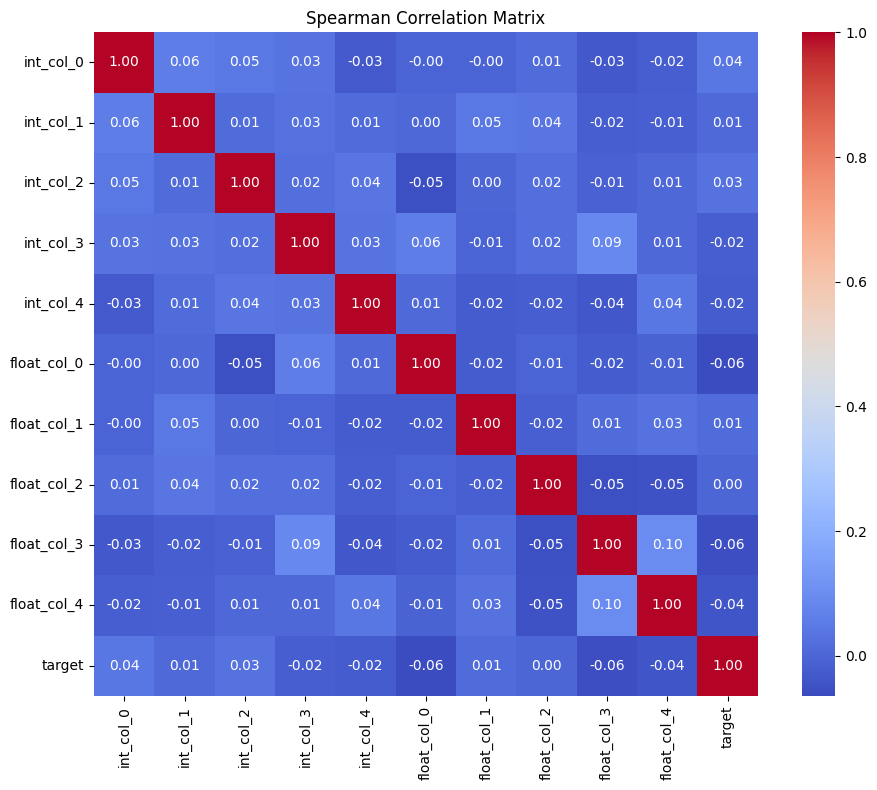

In [108]:
corr_df, matrix = bivariate_analysis(df, cols=numeric_cols, method="spearman", plot=True, return_matrix=True, max_cat_uniques=20)

In [109]:
corr_df, matrix = bivariate_analysis(df, cols=numeric_cols, method="spearman", plot=False, return_matrix=True, max_cat_uniques=20)
corr_df.head(10)

C:\Users\varun\AppData\Local\Temp\ipykernel_17716\3716334617.py:32: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cat_cols = [col for col in cols if (ptypes.is_categorical_dtype(df[col]) or ptypes.is_object_dtype(df[col]) or df[col].nunique() <= max_cat_uniques)]


,Column_1,Column_2,Method,Stat,P_Value
0,int_col_0,int_col_1,Spearman,0.0583,0.065516
1,int_col_0,int_col_2,Spearman,0.0454,0.151823
2,int_col_0,int_col_3,Spearman,0.0346,0.274213
3,int_col_0,int_col_4,Spearman,-0.0283,0.371604
4,int_col_0,float_col_0,Spearman,-0.0020,0.950728
5,int_col_0,float_col_1,Spearman,-0.0045,0.887777
6,int_col_0,float_col_2,Spearman,0.0113,0.721706
7,int_col_0,float_col_3,Spearman,-0.0322,0.309030
8,int_col_0,float_col_4,Spearman,-0.0197,0.534746
9,int_col_0,target,Spearman,0.0438,0.166805


C:\Users\varun\AppData\Local\Temp\ipykernel_17716\3716334617.py:32: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cat_cols = [col for col in cols if (ptypes.is_categorical_dtype(df[col]) or ptypes.is_object_dtype(df[col]) or df[col].nunique() <= max_cat_uniques)]


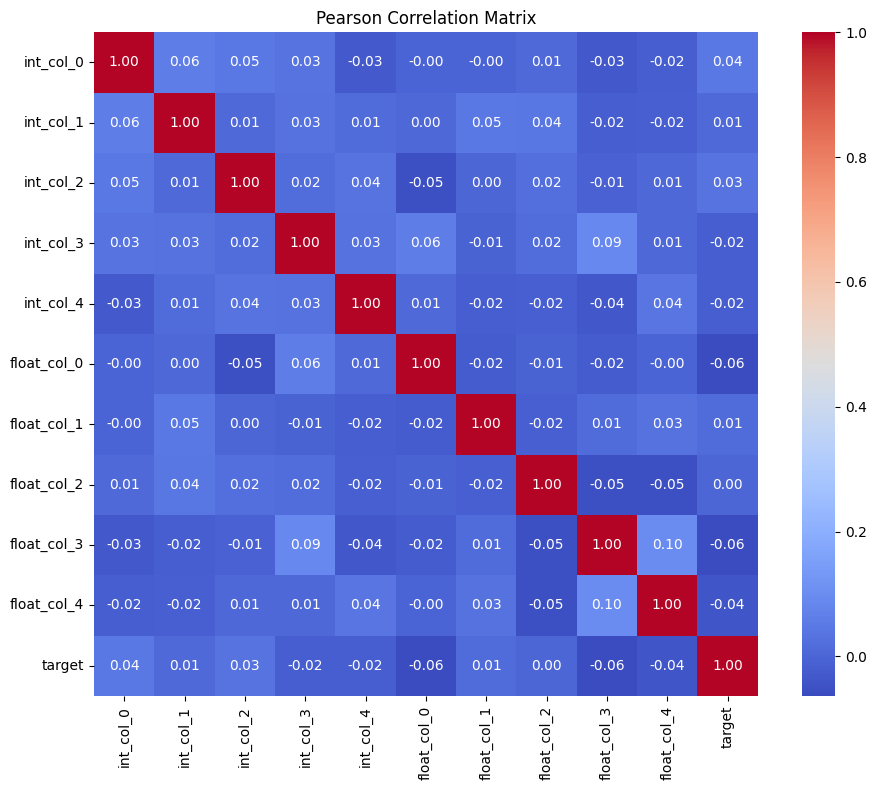

In [110]:
corr_df, matrix = bivariate_analysis(df, cols=numeric_cols, method="pearson", plot=True, return_matrix=True, max_cat_uniques=20)

In [111]:
corr_df, matrix = bivariate_analysis(df, cols=numeric_cols, method="pearson", plot=False, return_matrix=True, max_cat_uniques=20)
corr_df.head(10)

C:\Users\varun\AppData\Local\Temp\ipykernel_17716\3716334617.py:32: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cat_cols = [col for col in cols if (ptypes.is_categorical_dtype(df[col]) or ptypes.is_object_dtype(df[col]) or df[col].nunique() <= max_cat_uniques)]


,Column_1,Column_2,Method,Stat,P_Value
0,int_col_0,int_col_1,Pearson,0.0581,0.066322
1,int_col_0,int_col_2,Pearson,0.0469,0.138474
2,int_col_0,int_col_3,Pearson,0.0349,0.270261
3,int_col_0,int_col_4,Pearson,-0.0278,0.379448
4,int_col_0,float_col_0,Pearson,-0.0028,0.929661
5,int_col_0,float_col_1,Pearson,-0.0042,0.894777
6,int_col_0,float_col_2,Pearson,0.0097,0.759200
7,int_col_0,float_col_3,Pearson,-0.0321,0.310692
8,int_col_0,float_col_4,Pearson,-0.0205,0.516759
9,int_col_0,target,Pearson,0.0448,0.157134


In [112]:
def percentile_distribution(df, cols=None, plot=False, percentiles=[0, 1, 5, 10, 25, 50, 75, 90, 95, 99, 100]):
    """
    Computes percentile distribution for numeric columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input dataset.
    - cols (list): List of numeric columns to include. If None, auto-selects numeric columns.
    - plot (bool): Whether to plot the percentiles.
    - percentiles (list): List of percentiles to compute (0-100).

    Returns:
    - pd.DataFrame: DataFrame with percentiles for each column.
    """

    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Convert percentiles to range [0,1] if needed
    pct_vals = [p / 100.0 if p > 1 else p for p in percentiles]

    # Collect percentile stats
    percentile_df = df[cols].quantile(pct_vals).T
    percentile_df.columns = [f"P{int(p*100)}" for p in pct_vals]
    percentile_df.reset_index(inplace=True)
    percentile_df.rename(columns={'index': 'Column'}, inplace=True)

    if plot:
        for i, row in percentile_df.iterrows():
            plt.figure(figsize=(8, 4))
            values = row[1:].values.astype(float)
            plt.plot(percentiles, values, marker='o', linestyle='-')
            plt.title(f"Percentile Distribution: {row['Column']}")
            plt.xlabel("Percentile")
            plt.ylabel("Value")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return percentile_df


In [113]:
percentile_df = percentile_distribution(df, cols=numeric_cols, percentiles=[0, 1, 5, 10, 25, 50, 75, 90, 95, 99])
percentile_df.head()

,Column,P0,P100,P5,P10,P25,P50,P75,P90,P95,P99
0,int_col_0,0.0,999.0,48.0,101.0,253.0,512.0,745.75,896.1,946.00,990.00
1,int_col_1,2.0,998.0,58.0,101.7,255.0,505.0,753.00,902.2,943.00,986.01
2,int_col_2,0.0,999.0,49.0,105.0,246.0,495.5,781.25,910.1,951.05,987.00
3,int_col_3,0.0,998.0,54.9,110.0,263.5,500.0,749.00,907.1,943.05,986.00
4,int_col_4,0.0,999.0,64.0,96.9,217.5,496.0,725.00,888.1,938.05,985.02


In [114]:
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind

def stats_analysis(df, target=None, method="pearson", max_cat_uniques=20, plot=True):
    """
    Performs comprehensive statistical and visual analysis:
    - Histogram for all columns
    - Correlation matrix (Pearson/Spearman)
    - ANOVA: categorical/boolean vs numeric
    - T-Test: binary category vs numeric
    - Decile analysis
    - Text analysis by length correlation

    Parameters:
    - df (pd.DataFrame)
    - target (str): Optional target variable for decile analysis.
    - method (str): 'pearson' or 'spearman' for numeric correlation.
    - max_cat_uniques (int): Unique count to treat object as categorical.
    - plot (bool): Show plots

    Returns:
    - results_df (pd.DataFrame): All test results with stat and p-values.
    """
    results = []

    # Identify column types
    numeric_cols = [col for col in df.columns if ptypes.is_numeric_dtype(df[col]) and not ptypes.is_bool_dtype(df[col])]
    bool_cols = [col for col in df.columns if ptypes.is_bool_dtype(df[col])]
    cat_cols = [col for col in df.columns if (
        ptypes.is_object_dtype(df[col]) or ptypes.is_categorical_dtype(df[col]) or df[col].nunique() <= max_cat_uniques
    )]
    cat_cols = list(set(cat_cols) - set(bool_cols) - set(numeric_cols))

    # 1. Histograms
    if plot and numeric_cols:
        df[numeric_cols].hist(bins=30, figsize=(15, 8), edgecolor='black')
        plt.suptitle("Histograms of Numeric Columns", fontsize=16)
        plt.tight_layout()
        plt.show()

    # 2. Correlation Matrix
    if len(numeric_cols) >= 2:
        corr_func = pearsonr if method == "pearson" else spearmanr
        corr_matrix = df[numeric_cols].corr(method=method)

        for i in range(len(numeric_cols)):
            for j in range(i+1, len(numeric_cols)):
                x, y = numeric_cols[i], numeric_cols[j]
                corr, pval = corr_func(df[x].dropna(), df[y].dropna())
                results.append({
                    "Column_1": x, "Column_2": y, "Type": "Numeric-Numeric",
                    "Method": f"{method.capitalize()} Correlation", "Stat": round(corr, 4), "P_Value": round(pval, 6)
                })

        if plot:
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
            plt.title(f"{method.capitalize()} Correlation Matrix")
            plt.tight_layout()
            plt.show()

    # 3. ANOVA / T-Test
    for cat in cat_cols + bool_cols:
        for num in numeric_cols:
            groups = [g[1] for g in df[[cat, num]].dropna().groupby(cat)[num]]
            if len(groups) < 2:
                continue

            try:
                if df[cat].nunique() == 2:
                    # T-test for binary categorical
                    stat, pval = ttest_ind(*groups)
                    method_name = "T-Test"
                else:
                    # ANOVA for multi-class
                    stat, pval = f_oneway(*groups)
                    method_name = "ANOVA"

                results.append({
                    "Column_1": cat, "Column_2": num, "Type": "Categorical-Numeric",
                    "Method": method_name, "Stat": round(stat, 4), "P_Value": round(pval, 6)
                })

                if plot:
                    plt.figure(figsize=(8, 5))
                    sns.boxplot(x=cat, y=num, data=df)
                    sns.stripplot(x=cat, y=num, data=df, color="black", alpha=0.3, jitter=True)
                    plt.title(f"{num} by {cat}")
                    plt.xticks(rotation=45)
                    plt.tight_layout()
                    plt.show()

            except Exception as e:
                print(f"Statistical test failed for {cat} vs {num}: {e}")

    # 4. Decile Analysis (if target provided)
    if target and target in numeric_cols:
        df = df.copy()
        df["decile"] = pd.qcut(df[target], 10, labels=False, duplicates="drop")

        if plot:
            decile_means = df.groupby("decile")[target].mean()
            plt.figure(figsize=(8, 5))
            sns.barplot(x=decile_means.index, y=decile_means.values, palette="Blues_d")
            plt.title(f"Decile Means of Target: {target}")
            plt.xlabel("Decile")
            plt.ylabel("Mean Value")
            plt.tight_layout()
            plt.show()

        results.append({
            "Column_1": target, "Column_2": "decile",
            "Type": "Numeric-Decile", "Method": "Decile Analysis",
            "Stat": "See Plot", "P_Value": "N/A"
        })

    return pd.DataFrame(results)


In [136]:
df.columns

Index(['bool_col_0', 'bool_col_1', 'bool_col_2', 'bool_col_3', 'bool_col_4',
       'int_col_0', 'int_col_1', 'int_col_2', 'int_col_3', 'int_col_4',
       'float_col_0', 'float_col_1', 'float_col_2', 'float_col_3',
       'float_col_4', 'text_col_0', 'text_col_1', 'text_col_2', 'text_col_3',
       'text_col_4', 'cat_col_0', 'cat_col_1', 'cat_col_2', 'cat_col_3',
       'cat_col_4', 'date_col_0', 'date_col_1', 'date_col_2', 'date_col_3',
       'date_col_4', 'target'],
      dtype='object')

C:\Users\varun\AppData\Local\Temp\ipykernel_17716\2569814027.py:29: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  ptypes.is_object_dtype(df[col]) or ptypes.is_categorical_dtype(df[col]) or df[col].nunique() <= max_cat_uniques


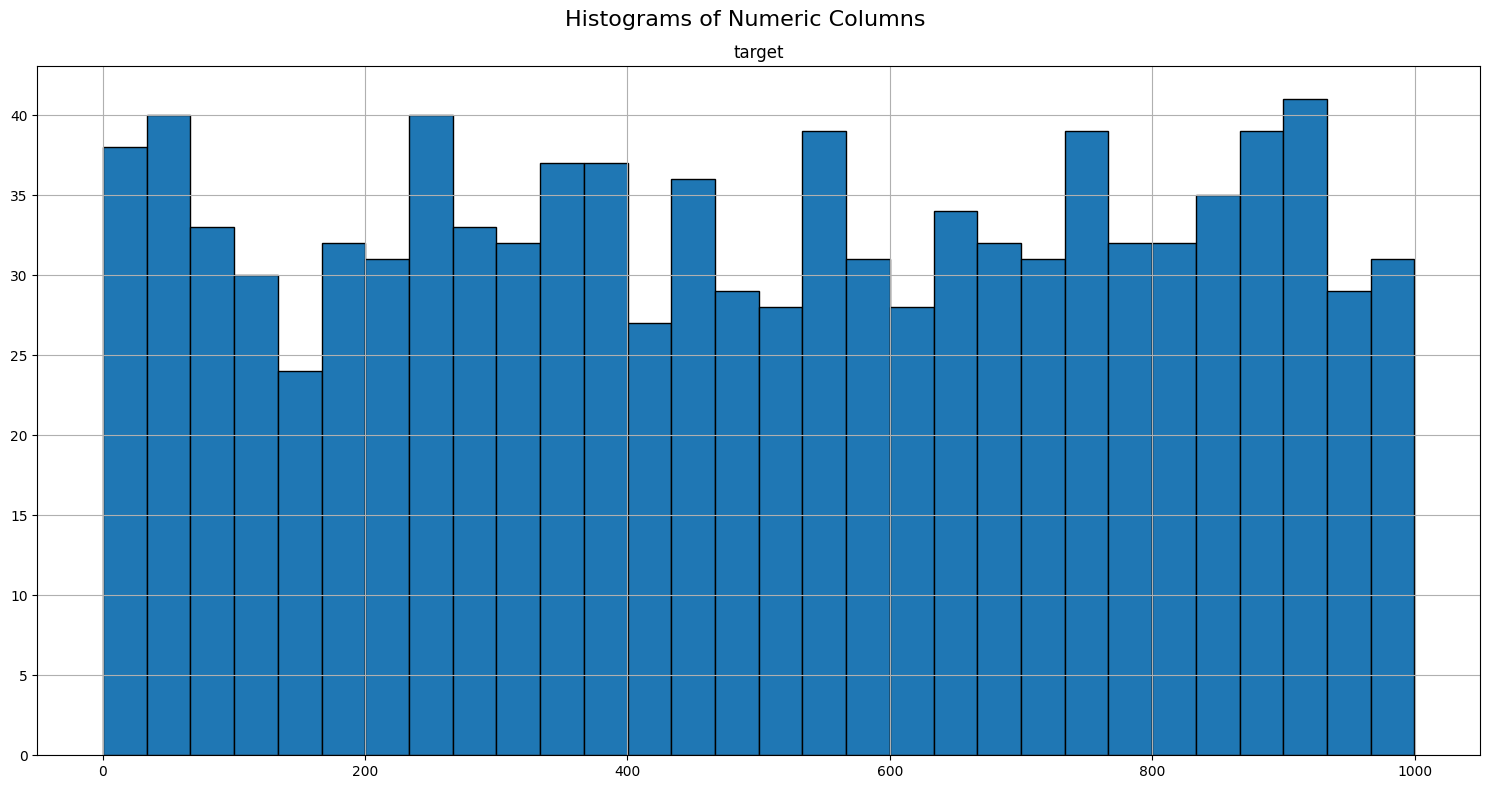

c:\Users\varun\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:3877: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


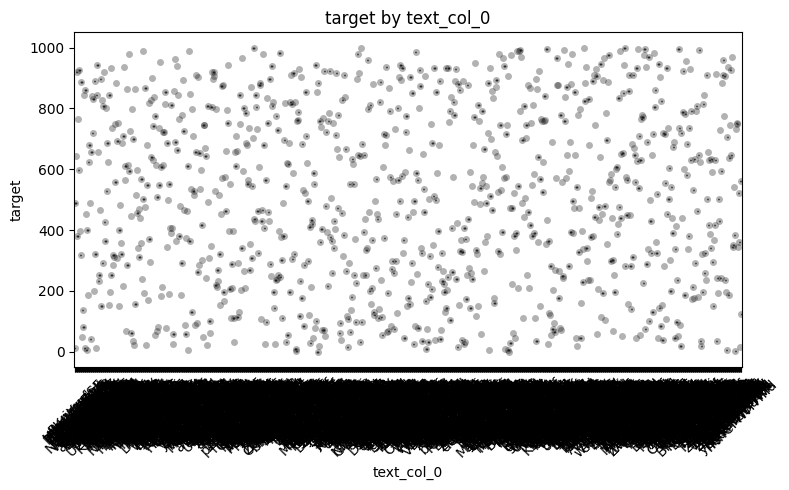

C:\Users\varun\AppData\Local\Temp\ipykernel_17716\2569814027.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decile_means.index, y=decile_means.values, palette="Blues_d")


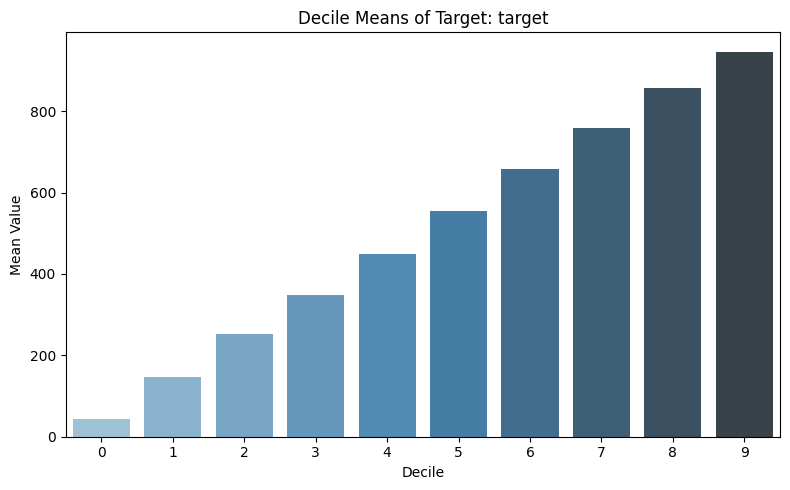

,Column_1,Column_2,Type,Method,Stat,P_Value
0,text_col_0,target,Categorical-Numeric,ANOVA,NaN,NaN
1,target,decile,Numeric-Decile,Decile Analysis,See Plot,N/A


In [116]:
stats_analysis(df=df[categorical_cols[:1] + ['target']], target="target", method="spearman", plot=True)

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu, ks_2samp

def compare_group_distributions(df, group_col, value_col, plot=True):
    """
    Compares distributions of a numeric column across two groups using statistical tests.

    Performs:
    - Independent T-test
    - Wilcoxon signed-rank test (if same-length)
    - Mann-Whitney U test
    - Kolmogorov-Smirnov (KS) test
    Optionally plots distribution curves (histogram + KDE).

    Parameters:
    - df (pd.DataFrame): Dataset.
    - group_col (str): Column with two categories.
    - value_col (str): Numeric column to compare.
    - plot (bool): Show distribution plots.

    Returns:
    - pd.DataFrame: Single-row DataFrame with test statistics and p-values.
    """
    df = df[[group_col, value_col]].dropna()
    unique_groups = df[group_col].unique()

    if len(unique_groups) != 2:
        raise ValueError("group_col must have exactly 2 unique values.")

    group1 = df[df[group_col] == unique_groups[0]][value_col]
    group2 = df[df[group_col] == unique_groups[1]][value_col]

    results = {}

    # --- Statistical Tests ---
    # 1. T-test (independent)
    t_stat, t_p = ttest_ind(group1, group2, equal_var=False)
    results["t_statistic"] = round(t_stat, 4)
    results["t_p_value"] = round(t_p, 6)

    # 2. Wilcoxon (only if same length)
    try:
        if len(group1) == len(group2):
            w_stat, w_p = wilcoxon(group1.values, group2.values)
            results["wilcoxon_statistic"] = round(w_stat, 4)
            results["wilcoxon_p_value"] = round(w_p, 6)
        else:
            results["wilcoxon_statistic"] = np.nan
            results["wilcoxon_p_value"] = np.nan
    except Exception as e:
        results["wilcoxon_statistic"] = np.nan
        results["wilcoxon_p_value"] = np.nan

    # 3. Mann-Whitney U test
    mw_stat, mw_p = mannwhitneyu(group1, group2, alternative='two-sided')
    results["mannwhitney_statistic"] = round(mw_stat, 4)
    results["mannwhitney_p_value"] = round(mw_p, 6)

    # 4. Kolmogorov-Smirnov test
    ks_stat, ks_p = ks_2samp(group1, group2)
    results["ks_statistic"] = round(ks_stat, 4)
    results["ks_p_value"] = round(ks_p, 6)

    # --- Distribution Plots ---
    if plot:
        plt.figure(figsize=(10, 6))
        sns.histplot(group1, color='blue', kde=True, stat='density', label=f'{unique_groups[0]}', alpha=0.5)
        sns.histplot(group2, color='orange', kde=True, stat='density', label=f'{unique_groups[1]}', alpha=0.5)
        plt.title(f"Distribution Comparison: {value_col} by {group_col}")
        plt.xlabel(value_col)
        plt.ylabel("Density")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return pd.DataFrame([results])


In [137]:
df.columns

Index(['bool_col_0', 'bool_col_1', 'bool_col_2', 'bool_col_3', 'bool_col_4',
       'int_col_0', 'int_col_1', 'int_col_2', 'int_col_3', 'int_col_4',
       'float_col_0', 'float_col_1', 'float_col_2', 'float_col_3',
       'float_col_4', 'text_col_0', 'text_col_1', 'text_col_2', 'text_col_3',
       'text_col_4', 'cat_col_0', 'cat_col_1', 'cat_col_2', 'cat_col_3',
       'cat_col_4', 'date_col_0', 'date_col_1', 'date_col_2', 'date_col_3',
       'date_col_4', 'target'],
      dtype='object')

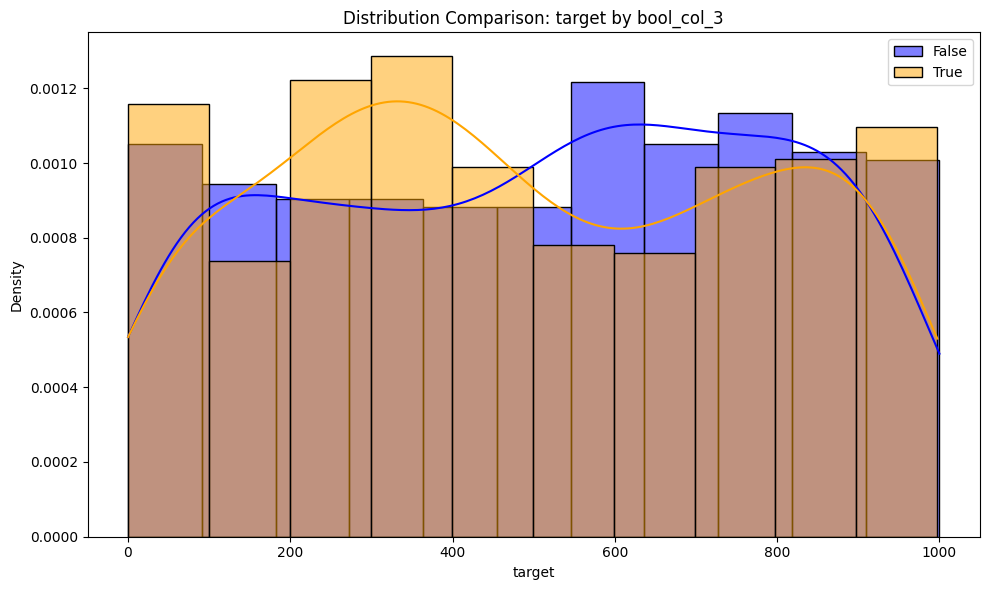

,t_statistic,t_p_value,wilcoxon_statistic,wilcoxon_p_value,mannwhitney_statistic,mannwhitney_p_value,ks_statistic,ks_p_value
0,0.9799,0.327378,NaN,NaN,129147.0,0.330958,0.0844,0.053185


In [139]:
compare_group_distributions(df, group_col='bool_col_3', value_col='target', plot=True)